In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sys, time

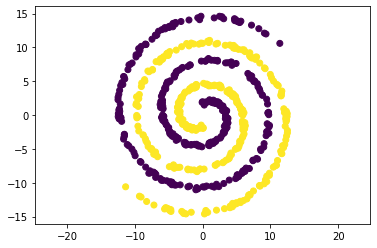

In [36]:
data_size = 333

dataset = twospirals(data_size)
labels = np.hstack((np.zeros(data_size),np.ones(data_size)))
plt.scatter(dataset[:,0], dataset[:,1], c = labels)
plt.axis('equal')
plt.show()

def twospirals(n_points, noise=.5):
    epsilon = 0.1
    n = (np.random.rand(n_points,1)+epsilon) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    C_1 = np.hstack((d1x,d1y))
    C_2 = np.hstack((-d1x,-d1y))
    return np.vstack((C_1, C_2))

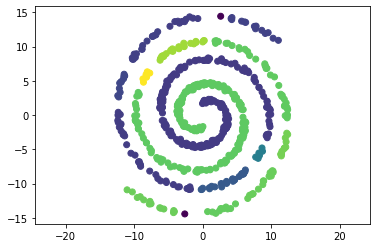

Normalized Runtime: 1.262556552886963 seconds
Actual Runtime:  1.2628490924835205 seconds
min_p: 1
epsilon: 1.5
--------------------------------------------


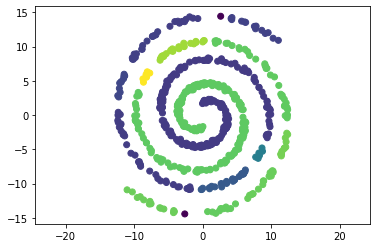

Normalized Runtime: 1.4256887435913086 seconds
Actual Runtime:  0.1628110408782959 seconds
min_p: 2
epsilon: 1.5
--------------------------------------------


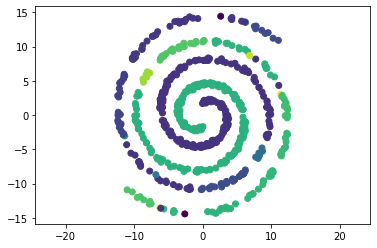

Normalized Runtime: 1.6110713481903076 seconds
Actual Runtime:  0.185438871383667 seconds
min_p: 3
epsilon: 1.5
--------------------------------------------


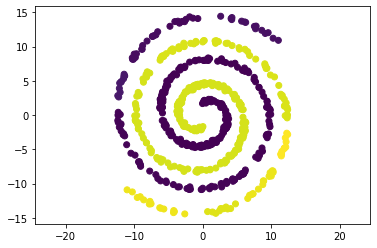

Normalized Runtime: 2.872849225997925 seconds
Actual Runtime:  1.2614755630493164 seconds
min_p: 1
epsilon: 1.7
--------------------------------------------


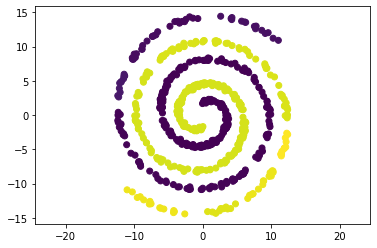

Normalized Runtime: 3.137643575668335 seconds
Actual Runtime:  0.26451587677001953 seconds
min_p: 2
epsilon: 1.7
--------------------------------------------


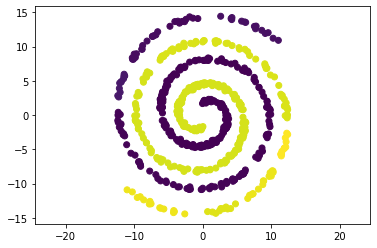

Normalized Runtime: 3.3155570030212402 seconds
Actual Runtime:  0.177825927734375 seconds
min_p: 3
epsilon: 1.7
--------------------------------------------


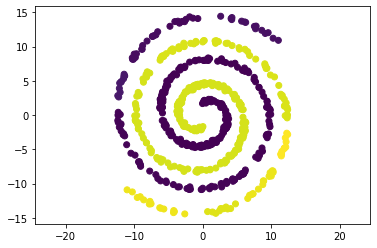

Normalized Runtime: 4.585293531417847 seconds
Actual Runtime:  1.2655527591705322 seconds
min_p: 1
epsilon: 1.9
--------------------------------------------


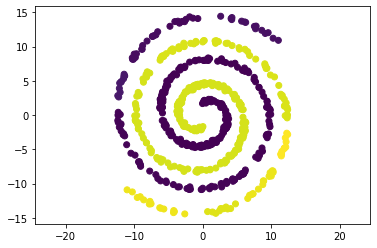

Normalized Runtime: 4.754909515380859 seconds
Actual Runtime:  0.16796517372131348 seconds
min_p: 2
epsilon: 1.9
--------------------------------------------


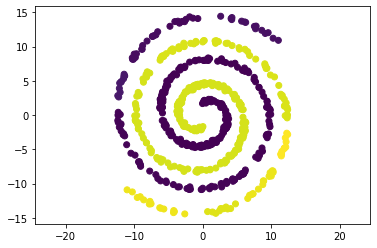

Normalized Runtime: 4.925416707992554 seconds
Actual Runtime:  0.17040395736694336 seconds
min_p: 3
epsilon: 1.9
--------------------------------------------


In [35]:
import sys, time
if (data_size > 750):
    sys.setrecursionlimit(10**6)
class DBSCAN():  
    def main_cluster(self, min_p = [2], eps = [1.7], TESTING_FLAGS = [1,1]):
        global labeled_set
        timer, s_timer = time.time(), time.time()
        for k in eps:
            sym_set = self.sym_neighbour(self.sorted_distances(k))
            for i in min_p:
                c, labeled_set = -1, [None]*data_size*2                                     #Init for loop counter and labeling array
                for x in sym_set:
                    c += 1
                    if (x == [] and labeled_set[c] is None):
                        labeled_set[c] = [-99,-1]                                           #[-99,-1] = noise
                    elif (labeled_set[c] is not None):
                        continue
                    else:
                        self.label(c, sym_set[c], sym_set, i)
                if (TESTING_FLAGS[0] == 1):
                    self.scatter_plotting(labeled_set)
                if (TESTING_FLAGS[1] == 1):
                    print("Normalized Runtime:", time.time() - timer, "seconds")
                    print("Actual Runtime: ", time.time() - s_timer , "seconds")
                    print("min_p:", i)
                    print("epsilon:", k)
                s_timer = time.time()
                print("--------------------------------------------")

    
    def scatter_plotting(self, labeled_set):
        plt.scatter(dataset[:,0], dataset[:,1], c = [x[0] for x in labeled_set])
        plt.axis('equal')
        plt.show()

    def plotter(self, x, y, xlabel, ylabel):
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    def label(self, c, sub_set, sym_set, min_p, depth = 0, overwriter = -1):        #Labels every cluster
        if (len(sub_set) < min_p):
            if (depth == 0):                                                        #Checking if neighbours are (or will be) core-points
                for i in sub_set:                                               
                    if (labeled_set[i] is not None and labeled_set[i][1] == 0):     #Mimics neighbour if it was an core-point and makes itself an border-point
                        labeled_set[c] = [labeled_set[i][0],1]
                        return()
                    z = (self.label(i, sym_set[i], sym_set, min_p, 1))              #Hardchecks if an neighbour could become an core-point
                    if (z[1]!=0):
                        continue
                    else:                                                           #If it was, makes itself an border-point and said neighbour an core-point
                        labeled_set[c] = [z[1],1]
                        return ()
                labeled_set[c] = [-99,-1]                                           #If not, then it will be marked as noise
            return([0,-1])                                                          #Noise-flag if checks were unsuccessful for len(sub_set) < min_p && depth == 1
        if (depth == 1):
            if (labeled_set[c] is not None):
                return (labeled_set[c])
            labeled_set[c] = [c,0]
            return (labeled_set[c])
        if (overwriter != -1):                                                      #Overwrites c with overwriter for labeling
            labeled_set[c] = [overwriter,0]
        else:
            labeled_set[c] = [c,0]
        for i in sub_set:
            if (labeled_set[i] is None and overwriter == -1):                       #Needed if core-point detected another core-point to mark it as one of its own
                self.label(i, sym_set[i], sym_set, min_p, 0, c)
            elif (labeled_set[i] is None):
                self.label(i, sym_set[i], sym_set, min_p, 0, overwriter)


    def sym_neighbour(self, comp_set) -> [[int],[int],...]:                         # Mirroring Neighbour values
        c = len(comp_set)
        reversed_comp_set = list(reversed(comp_set))                                # Needs to be reversed to avoid duplicates due to array order
        for i in reversed_comp_set:
            c -= 1
            if (i == []):
                continue
            try:
                for n in i:
                    comp_set[n].append(c)
            except:
                pass
        return(comp_set)
    def sorted_distances(self, eps) -> [[[int,int],[int,int],...],...]:             #Returns list of indexed ordered distances of every point 
        comp_set,euclid_set = [], []
        for i in range(data_size*2):                                                #Calc. Euc.distance of x against every other point minus the points already calculated to halve calc. time
            for n in range(data_size*2-i-1):
                euclid_set.append([np.sqrt(((dataset[i][0] - dataset[n+i+1][0])**2) + (dataset[i][1] - dataset[n+i+1][1])**2),(n+i+1)])
            comp_set.append([x[1] for x in sorted(euclid_set) if x[0]<eps])         #Only appending values if the distance is smaller than epsilon
            euclid_set = []
        return(comp_set)

#Main_cluster is the method to test this code.
#min_p <- [0,...,n]: DBSCAN for every given min_p
#eps <- [0,...,n]: DBSCAN for every given eps
#TESTING_FLAGS <-[0|1,0|1]: [0] plots cluster, [1] prints runtime/min_p/eps
db = DBSCAN()
db.main_cluster([1,2,3], [1.5,1.7,1.9])